<a href="https://colab.research.google.com/github/Priyo-prog/Artificial-Intelligence-Projects/blob/main/AI%20in%20Marketing/marketing_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI in Marketing**

* Marketing is crucial for growth and sutainability of reatil business
* One of the key pain points is to know their customers and identify their needs.
* By understanding the customers, marketers can launch a targeted marketing campaign that is tailored for specific needs.
* Our target is to create targeted ad marketing campaign by dividing the customers into atleast 3 distinctive groups.

## **Import Important Packages and Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
import plotly.express as px
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import plotly.graph_objects as go

from google.colab import files
%matplotlib inline

## **Mount the Drive and Make Default Drive to Upload the Dataset**

In [2]:
# mount the google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Navigate to My Drive directory make it default to upload data and store models
%cd /content/drive/MyDrive/Artificial Intelligence Projects/AI in Marketing

/content/drive/MyDrive/Artificial Intelligence Projects/AI in Marketing


In [4]:
sales_df = pd.read_csv('/content/drive/MyDrive/Artificial Intelligence Projects/AI in Marketing/sales_data_sample.csv', encoding="unicode_escape")

In [5]:
sales_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


Convert the ORDERDATE in date time format in pandas

In [7]:
sales_df["ORDERDATE"] = pd.to_datetime(sales_df["ORDERDATE"])

In [8]:
sales_df["ADDRESSLINE2"].isna().sum()

2521

Since there are lot of null value in 'addressline2', 'state', 'postal code' and 'territory' we can drop them.

In [9]:
df_drop = ["ADDRESSLINE1", "ADDRESSLINE2", "POSTALCODE", "CITY", "TERRITORY", "PHONE", 
           "STATE", "CONTACTFIRSTNAME", "CONTACTLASTNAME", "CUSTOMERNAME", "ORDERNUMBER"]
sales_df = sales_df.drop(df_drop, axis=1)
sales_df.head()           

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [10]:
sales_df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [11]:
# How many unique records are there in the column
sales_df.nunique()

QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
ORDERDATE           252
STATUS                6
QTR_ID                4
MONTH_ID             12
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
PRODUCTCODE         109
COUNTRY              19
DEALSIZE              3
dtype: int64

## **Perform Exploratory Data Analysis and Data Cleaning - Part 1**

Find how many countries are there and number of samples of those countries are there in the dataset

In [12]:
sales_df["COUNTRY"].value_counts().index

Index(['USA', 'Spain', 'France', 'Australia', 'UK', 'Italy', 'Finland',
       'Norway', 'Singapore', 'Canada', 'Denmark', 'Germany', 'Sweden',
       'Austria', 'Japan', 'Belgium', 'Switzerland', 'Philippines', 'Ireland'],
      dtype='object')

In [13]:
sales_df["COUNTRY"].value_counts()

USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: COUNTRY, dtype: int64

In [14]:
# Function to visualize the count of items in a given number

def barplot_visualization(x):
  fig = plt.Figure(figsize=(12,6))
  fig = px.bar(x = sales_df[x].value_counts().index, 
               y = sales_df[x].value_counts(), 
               color = sales_df[x].value_counts().index, 
               height=600)
  fig.show()

In [15]:
# Let's call the function for any given column such as 'COUNTRY'

barplot_visualization("COUNTRY")

In [16]:
# How many unique order status are there ?
sales_df["STATUS"].value_counts().index

Index(['Shipped', 'Cancelled', 'Resolved', 'On Hold', 'In Process',
       'Disputed'],
      dtype='object')

In [17]:
sales_df["STATUS"].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

In [18]:
barplot_visualization("STATUS")

The satus shown above are mostly unbalanced since most of them are "Shipped"

In [19]:
sales_df.drop(columns=["STATUS"], inplace=True)

In [20]:
# Function to add dummy variables to replace categorical variables

def dummies(x):
  dummy = pd.get_dummies(sales_df[x])
  sales_df.drop(columns=x, inplace=True)
  return pd.concat([sales_df, dummy], axis=1)

In [21]:
# Let's obtain the dummy variables for the column "COUNTRY"

sales_df = dummies("COUNTRY")
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,...,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,0
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,1
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,1


In [22]:
sales_df = dummies("PRODUCTLINE")

In [50]:
sales_df = dummies("DEALSIZE")

### **Encoding The Categorical Variables**

In [23]:
y = pd.Categorical(sales_df["PRODUCTCODE"])
y

['S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', ..., 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212']
Length: 2823
Categories (109, object): ['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', ..., 'S700_3962',
                           'S700_4002', 'S72_1253', 'S72_3212']

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["PRODUCTCODE"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")

# Passing the "sales_df" has issues it doesn't allow the Timestamp
# and other catergorical values, all have to be converted.
# Therefore creating only datframe of "PRODUCTCODE" and then concatenate
# it to original dataframe. 

product_code_df = sales_df["PRODUCTCODE"]
product_code_df = product_code_df.to_frame()

product_code_df = transformer.fit_transform(product_code_df)
type(product_code_df)

scipy.sparse.csr.csr_matrix

In [25]:
sales_df_copy = sales_df

In [26]:
print(product_code_df)

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 0)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  :	:
  (2798, 108)	1.0
  (2799, 108)	1.0
  (2800, 108)	1.0
  (2801, 108)	1.0
  (2802, 108)	1.0
  (2803, 108)	1.0
  (2804, 108)	1.0
  (2805, 108)	1.0
  (2806, 108)	1.0
  (2807, 108)	1.0
  (2808, 108)	1.0
  (2809, 108)	1.0
  (2810, 108)	1.0
  (2811, 108)	1.0
  (2812, 108)	1.0
  (2813, 108)	1.0
  (2814, 108)	1.0
  (2815, 108)	1.0
  (2816, 108)	1.0
  (2817, 108)	1.0
  (2818, 108)	1.0
  (2819, 108)	1.0
  (2820, 108)	1.0
  (2821, 108)	1.0
  (2822, 108)	1.0


In [27]:
df = pd.DataFrame(product_code_df.todense())

In [28]:
df.head(), df.shape


(   0    1    2    3    4    5    6    7    8    9    ...  99   100  101  102  \
 0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
 1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
 2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
 3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
 4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
 
    103  104  105  106  107  108  
 0  0.0  0.0  0.0  0.0  0.0  0.0  
 1  0.0  0.0  0.0  0.0  0.0  0.0  
 2  0.0  0.0  0.0  0.0  0.0  0.0  
 3  0.0  0.0  0.0  0.0  0.0  0.0  
 4  0.0  0.0  0.0  0.0  0.0  0.0  
 
 [5 rows x 109 columns], (2823, 109))

In [29]:
# Handling curse of dimensionality using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

pca.fit(df)

PCA(n_components=1)

In [30]:
pca.components_

array([[-0.00880723, -0.01319812, -0.00657743, -0.01176621, -0.01003637,
        -0.01632637, -0.00834031, -0.01285877, -0.01377035, -0.00723784,
        -0.00852569, -0.00974327, -0.00980618, -0.00586813, -0.01076191,
        -0.00997133, -0.01499881, -0.00856606, -0.00942523, -0.01079612,
        -0.00999937, -0.01194428, -0.00665903, -0.0112894 , -0.01218903,
        -0.00761931, -0.0071058 , -0.00946603, -0.00848655, -0.01011842,
        -0.00761217, -0.00950686, -0.00921375, -0.00960692, -0.00959332,
        -0.01056442, -0.00915762, -0.00602987, -0.00668146,  0.99515764,
        -0.00663082, -0.00732864, -0.00878169, -0.00929037, -0.0090397 ,
        -0.0083602 , -0.00738117, -0.00845477, -0.00700797, -0.0099171 ,
        -0.01069591, -0.01086441, -0.00993172, -0.00708476, -0.00666069,
        -0.00492327, -0.01215674, -0.00758541, -0.00790858, -0.01076076,
        -0.00883723, -0.01042589, -0.0083429 , -0.01160966, -0.00961367,
        -0.00727711, -0.01231529, -0.00990136, -0.0

In [31]:
df_product_code = pca.components_
df_product_code.shape

(1, 109)

In [32]:
df_product_code

array([[-0.00880723, -0.01319812, -0.00657743, -0.01176621, -0.01003637,
        -0.01632637, -0.00834031, -0.01285877, -0.01377035, -0.00723784,
        -0.00852569, -0.00974327, -0.00980618, -0.00586813, -0.01076191,
        -0.00997133, -0.01499881, -0.00856606, -0.00942523, -0.01079612,
        -0.00999937, -0.01194428, -0.00665903, -0.0112894 , -0.01218903,
        -0.00761931, -0.0071058 , -0.00946603, -0.00848655, -0.01011842,
        -0.00761217, -0.00950686, -0.00921375, -0.00960692, -0.00959332,
        -0.01056442, -0.00915762, -0.00602987, -0.00668146,  0.99515764,
        -0.00663082, -0.00732864, -0.00878169, -0.00929037, -0.0090397 ,
        -0.0083602 , -0.00738117, -0.00845477, -0.00700797, -0.0099171 ,
        -0.01069591, -0.01086441, -0.00993172, -0.00708476, -0.00666069,
        -0.00492327, -0.01215674, -0.00758541, -0.00790858, -0.01076076,
        -0.00883723, -0.01042589, -0.0083429 , -0.01160966, -0.00961367,
        -0.00727711, -0.01231529, -0.00990136, -0.0

In [33]:
df_product_code = pd.DataFrame(df_product_code)
df_product_code.head()

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,-0.008807,-0.013198,-0.006577,-0.011766,-0.010036,-0.016326,-0.00834,-0.012859,-0.01377,-0.007238,...,-0.004332,-0.00714,-0.010572,-0.00586,-0.007051,-0.011927,-0.009017,-0.011121,-0.010078,-0.008178


In the above process we had to check the shape of the "df" and then do PCA for . Since we missed it we will go originally by dataframe codes.

In [34]:
# Since the number of unique product code is 109, if we add one-hot variables,
# there would be additional 109 columns, we can avoid that by using categorical encoding.
# This is not the optimal way of dealing with it but it is important to avoid curse of dimensionality.

sales_df["PRODUCTCODE"] = pd.Categorical(sales_df["PRODUCTCODE"]).codes

In [35]:
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,0,...,0,0,1,0,1,0,0,0,0,0
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,0,...,0,0,0,0,1,0,0,0,0,0
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,0,...,0,0,0,0,1,0,0,0,0,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,0,...,0,0,1,0,1,0,0,0,0,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,0,...,0,0,1,0,1,0,0,0,0,0


## **Perform Exploratory Data Analysis - Part 2**

In [36]:
# Group data by order date

sales_df_group = sales_df.groupby(by="ORDERDATE").sum()
sales_df_group.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
ORDERDATE,,,,,,,,,,,,,,,,,,,,,
2003-01-06,151,288.78,10,12133.25,4,4,8012,363,174.0,0,...,0,0,4,0,0,0,0,0,0,4
2003-01-09,142,284.96,10,11432.34,4,4,8012,372,181.0,0,...,0,0,0,0,0,0,0,0,0,4
2003-01-10,80,150.14,3,6864.05,2,2,4006,155,37.0,0,...,0,0,2,0,0,0,0,0,0,2
2003-01-29,541,1417.54,136,54702.00,16,16,32048,1695,723.0,0,...,0,0,0,3,0,0,0,0,7,6
2003-01-31,443,1061.89,91,44621.96,13,13,26039,1365,720.0,0,...,0,0,0,7,0,0,0,2,4,0


When does the sales generally peak(which month) ?

In [37]:
fig = px.line(x=sales_df_group.index, y=sales_df_group.SALES, title="Monthly Sales")
fig.show()

In [38]:
# We drop the 'ORDERDATE' and keep the rest of the date related data such as 'MONTH'
sales_df.drop("ORDERDATE", axis=1, inplace=True)
sales_df.shape

(2823, 36)

Plot the correlation matrix between the variables

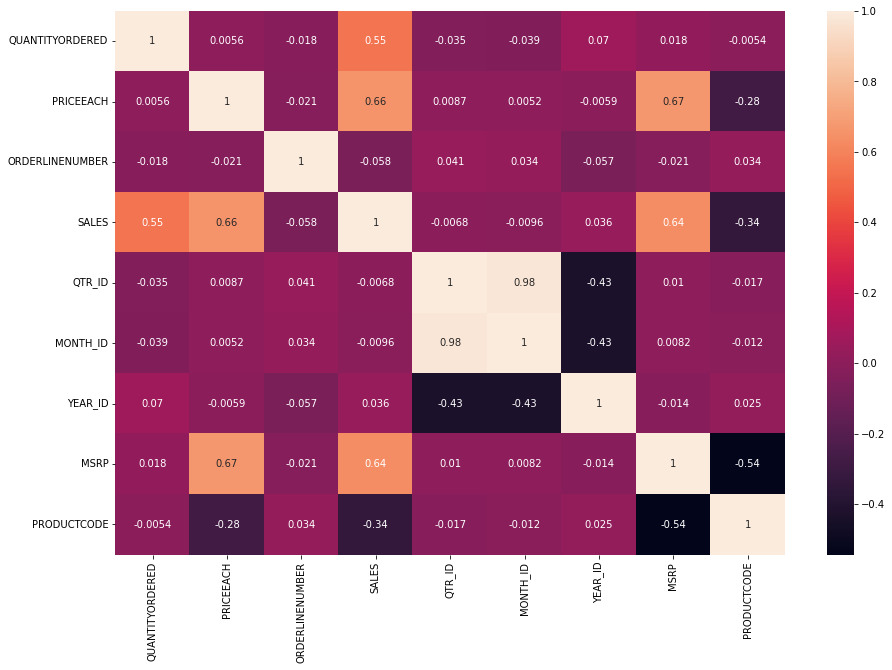

In [39]:
plt.figure(figsize=(15,10))
corr_matrix = sales_df.iloc[:, :10].corr()
sns.heatmap(corr_matrix, annot=True)

In [40]:
# It looks Quarter IDs and the Monthly IDs are highly correlated
# Let's drop the 'QTR_ID' (or 'MONTH_ID')
sales_df.drop("QTR_ID", axis=1, inplace=True)
sales_df.shape

(2823, 35)

In [41]:
# Let's plot distplots
# Distplots shows the (1) Histogram (2) kde plot and (3) rug plot
# (1) Histogram : it's a graphical display of data using bars with various heights.
# (2) Kde plot : Kernal Density Estimate is used for visualizing the Probability Density of a continuous variable.
# (3) Rug Plot : plot of data for a single quantitative variable, displayed as marks along an axis (one dimensional scatter plot)

import plotly.figure_factory as ff

plt.figure(figsize=(15,10))

for i in range(8):
  if sales_df.columns[i] != 'ORDERLINENUMBER':
    fig = ff.create_distplot([sales_df[sales_df.columns[i]].apply(lambda x: float(x))], ['distplot'])
    fig.update_layout(title_text=sales_df.columns[i])
    fig.show()

<Figure size 1080x720 with 0 Axes>

In [48]:
# Visualize the relationship between the variables using pairplots
plt.figure(figsize=(15,10))

fig = px.scatter_matrix(sales_df,
                        dimensions=sales_df.columns[:8], color="MONTH_ID")

fig.update_layout(
    title="Sales Data",
    width=1500,
    height=1100)
fig.show()

<Figure size 1080x720 with 0 Axes>

From the above pairplot we can derive the following points :

* A trend exists between 'SALES' and 'QUANTITYORDERED'
* A trend exists between 'MSRP' and 'PRICEEACH'
* A trend exists between 'PRICEEACH' and 'SALES'
* It seems that the sales growth exists as we move from 2013 to 2014 to 2015 ('SALES' vs 'YEAR_ID')

## **Find the Optimal Numbers of Clusters Using Elbow Method**

* The Elbow method is the heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset.
* If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.

In [51]:
# Scale the data
scaler = StandardScaler()
sales_df_scaled = scaler.fit_transform(sales_df)